In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import datetime, timezone, date
from dateutil.relativedelta import relativedelta
from itertools import combinations

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

import ccxt
import functions

import importlib
importlib.reload(functions)

sns.set_theme()


In [7]:
inst = ['ETH','UNI','SOL']
pairs = [('ETH','UNI'),('ETH','SOL')] #aave comp

In [8]:
today = date.today()
one_year_later = today - relativedelta(years=3)

In [9]:
# Create a datetime object for 2023-06-15 at midnight UTC
dt = datetime(one_year_later.year, one_year_later.month, one_year_later.day, 0, 0, 0, tzinfo=timezone.utc)

# Convert to Unix timestamp in milliseconds
timestamp_ms = int(dt.timestamp() * 1000)

In [10]:
df = functions.close_df(inst,timestamp_ms)

In [11]:
signal_df = functions.spread_formation(df,pairs,window=90)

In [ ]:
bounds = {
    ('ETH','UNI'): [2,-2.5],
    ('ETH','SOL'): [1.7,-1.5],
}

In [15]:
all_signals_df = functions.generate_pair_trading_signals(signal_df, pairs, bounds)

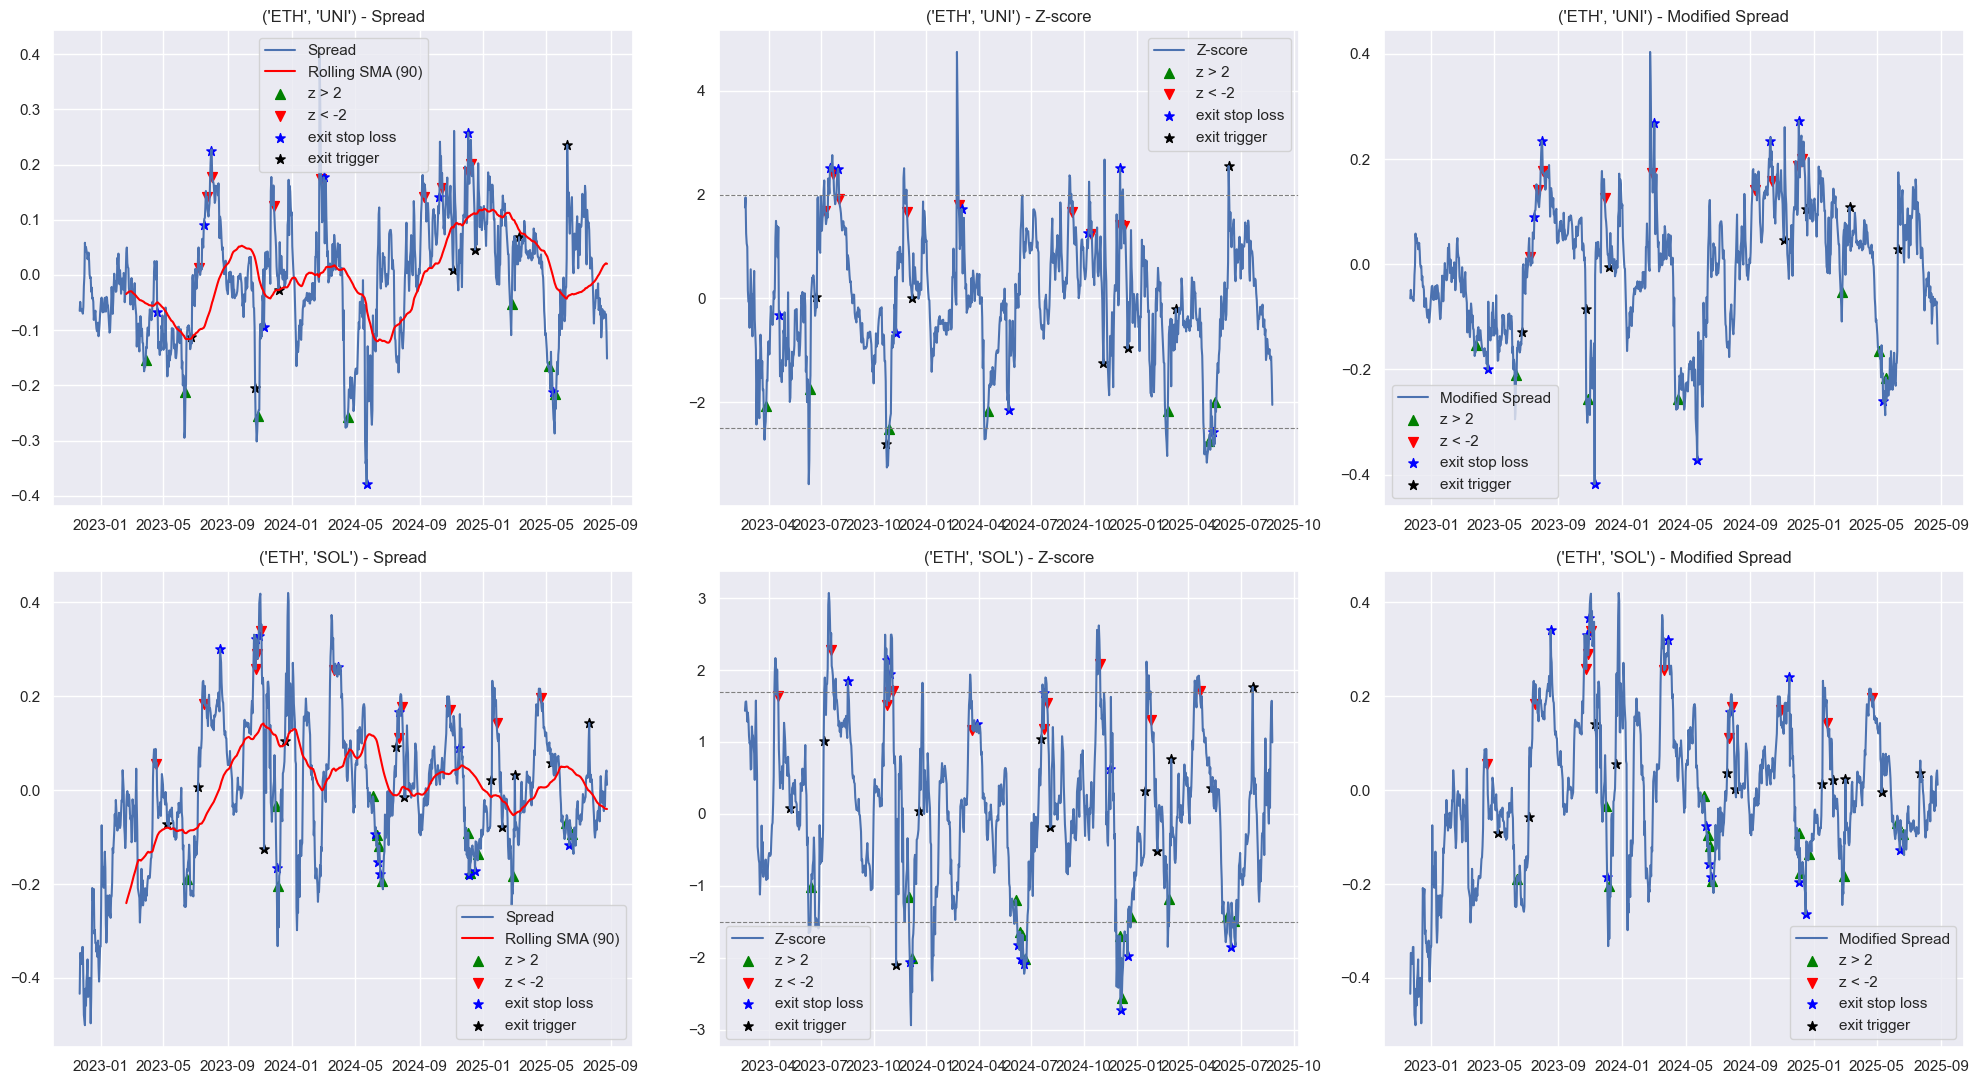

In [17]:
functions.plot_pair_trading_signals(signal_df, pairs, bounds, all_signals_df)

"positions": all_positions,
        "pnl": all_pnl,
        "realized_pnl": all_realized_pnl,
        "fees_paid": all_fees_paid

In [ ]:
backtest = functions.backtest_pairs_strategy(pairs,signal_df,bounds)


In [20]:
all_positions = backtest['positions']
all_pnl = backtest['pnl']

In [22]:
backtest['realized_pnl']

{('ETH', 'UNI'): np.float64(133992.04629192105),
 ('ETH', 'SOL'): np.float64(531178.8195243215)}

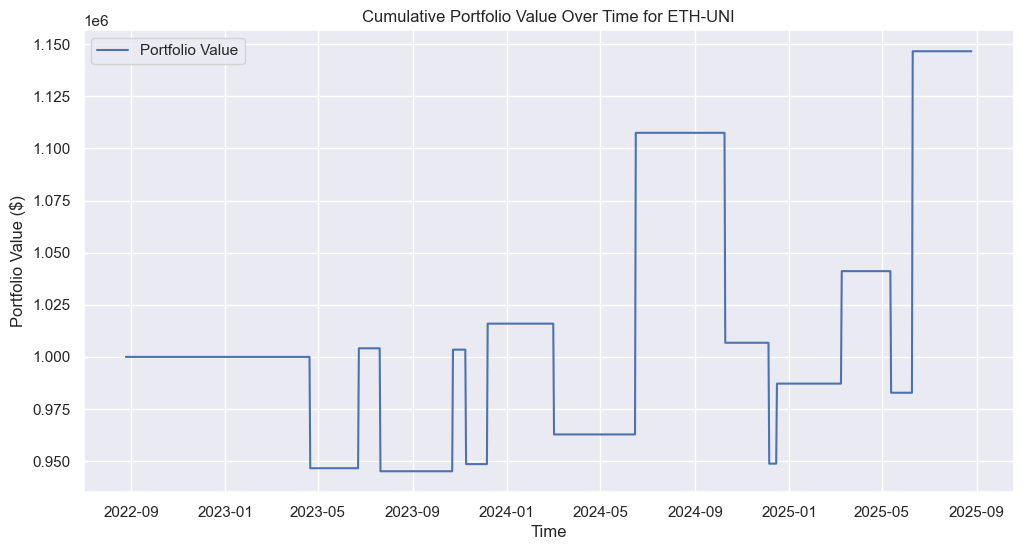

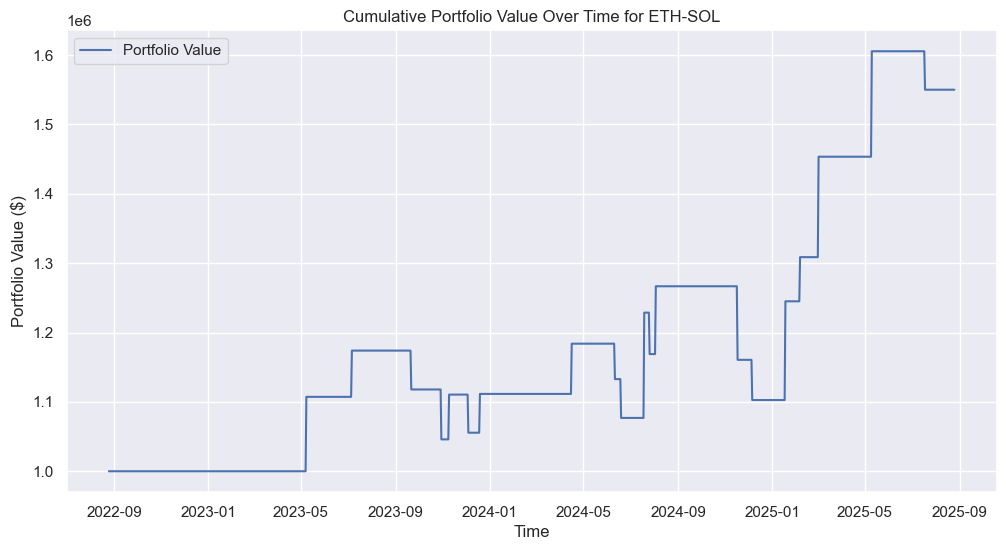

In [21]:
functions.plot_cumulative_realized_pnl(all_positions, all_pnl, signal_df, pairs)

1.  prepare your dataset and pairs list, e.g. ('ETH','UNI')
2. generate rolling spreads and etc